# Estatística Inferencial

## Conceitos Abordados
 - Variaveis Aleatórias
 - Modelos Probabilísticos (Distribuições)


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as wg
from ipywidgets import interactive, fixed

## “Se eu realizar 10 lançamentos de uma moeda, qual é a probabilidade de obter 6 caras?”

- Independentes -> Resultado de um evento não impacta no próximo evento.
- Various Bernoulli -> Bonomial 
- n (Tentativas)
- p (probabilidade)

In [2]:

def calc_probabilidade(n, p, vezes=6, size=100):
    ''' Calcula a probabilidade de [n] tentativas com [p] individuais por [size] vezes''' 
    return sum([1 for i in np.random.binomial(n, p, size=size) if i == vezes]) / size

calc_probabilidade(n=10, p=.5, vezes=6)

0.2

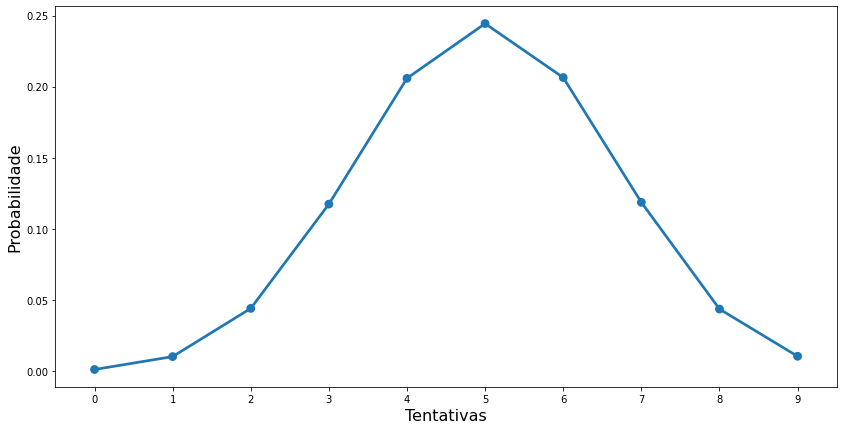

In [3]:
probabilidades = []
tentativas = []

for tentativa in range(10):
    tentativas.append(tentativa)
    probabilidades.append(calc_probabilidade(10, .5, tentativa, size=100000))


# Plot o grafico
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.pointplot(x=tentativas, y=probabilidades, label='Probabilidade')

ax.set_xlabel("Tentativas",fontsize=16)
ax.set_ylabel("Probabilidade",fontsize=16)

plt.savefig(fname='Probabilidade vs Tentativas', dpi=150)

É interessante como vamos aumentando o número de a quantidade de experimentos aleatórios e nossa distribuição binomial vai se aproximando de uma distribuição normal.

## Como podemos confiar nesse número, já que ele pode alterar constantemente? 

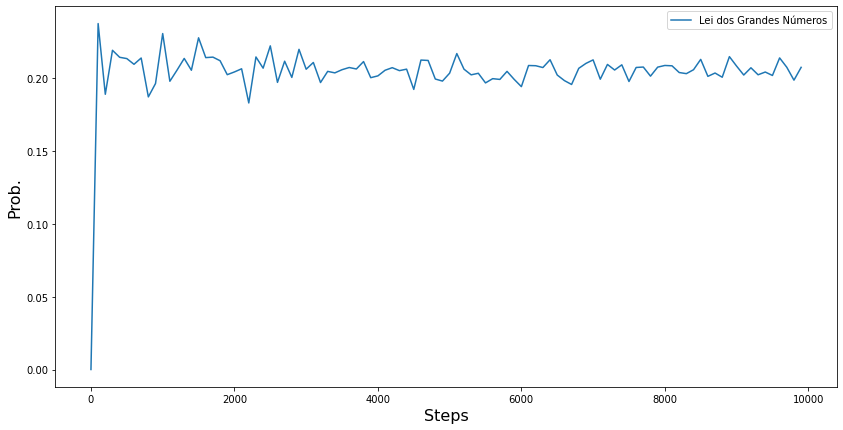

In [4]:
steps = []
probabilidades = []
p = 0.5
tentativas = 10

for size in range(1, 10000, 100):
    probabilidades.append(calc_probabilidade(tentativas, p, size=size))
    steps.append(size)


# Plot o grafico
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.lineplot(x=steps, y=probabilidades, label='Lei dos Grandes Números')

ax.set_xlabel("Steps",fontsize=16)
ax.set_ylabel("Prob.",fontsize=16)

plt.savefig(fname='Lei dos Grandes Números', dpi=150)

No gráfico acima podemos ver a "Lei dos Grandes Números" em ação, pois quanto mais experimentos realizamos, mas a probabilidade se estabiliza e sua variação diminui drásticamente.

## Desafio - "Call Center de Vendas"

Você foi contratado com o objetivo de aumentar o (ROI) de um Call Center, onde os atendentes ligam para potênciais clientes em busca de realizar uma venda.

Foi enviado um relatório com as seguintes informações:

- Um funcionário do call center realiza em média 50 chamadas por dia.
- A probabilidade de uma venda para cada chamada é de 4%.
- A receita média para sua empresa para cada venda é de R$20.
- O call center tem 100 atendentes.
- Cada empregado recebe 200 reais por dia de trabalho.



Analisando o  nosso problema cada ligação é independente e temos duas possibilidade __sucesso__ (houve venda) e __fracasso__ (não houve venda), podemos recorrer a Distribuição Binomial para modelar o problema.

Podemos iniciar modelando o problema, está claro que nosso n é o número de chamadas por dia e temos 4% de chance de sussuco, vamos realizar algumas simulações para entender melhor o problema.

In [5]:
# Simulação Call Center
atendentes = 100
custo = 200
n = 50
p = 0.04
receita = 100

vendas = np.random.binomial(n, p, size=atendentes)

print('Média de vendas por atendentes: ' + str(round(np.mean(vendas), 2)))
print('Desvio Padrão por atendentes: ' + str(round(np.std(vendas), 2)))
print('Total de Vendas: ' + str(np.sum(vendas)))
print('Total de Receitas: ' + str(np.sum(vendas) * receita))
print('Total de Custos: ' + str(atendentes * custo))
print('Lucro Total: ' + str(np.sum(vendas)* receita - atendentes * custo))

Média de vendas por atendentes: 2.07
Desvio Padrão por atendentes: 1.33
Total de Vendas: 207
Total de Receitas: 20700
Total de Custos: 20000
Lucro Total: 700


c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequêcia')

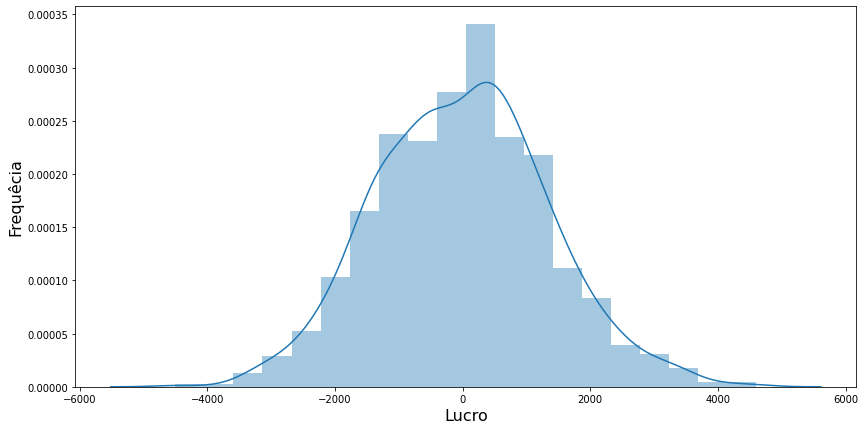

In [6]:

dias = 1000

vandas_atuais = [np.sum(np.random.binomial(n, p, size=atendentes)) for i in range(dias)]
lucro_atual = np.array(vandas_atuais) * receita - atendentes * custo

fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(lucro_atual, bins=20, label='Simulação')

ax.set_xlabel("Lucro",fontsize=16)
ax.set_ylabel("Frequêcia",fontsize=16)



Podemos notar como em muitas vezes nosso lucro fica zero e até negativo por boa parte do tempo, vamos realizar uns testes e ver como podemos mudar essa situação.

 



In [7]:
# Simulação Call Center

atendentes = 100
custo = 200
n = 50
p = 0.04
receita = 100
vendas = np.random.binomial(n, p, size=atendentes)

print('Média de vendas por atendentes: ' + str(round(np.mean(vendas), 2)))
print('Desvio Padrão por atendentes: ' + str(round(np.std(vendas), 2)))
print('Total de Vendas: ' + str(np.sum(vendas)))
print('Total de Receitas: ' + str(np.sum(vendas) * receita))
print('Total de Custos: ' + str(atendentes * custo))
print('Lucro Total: ' + str(np.sum(vendas)* receita - atendentes * custo))

Média de vendas por atendentes: 2.05
Desvio Padrão por atendentes: 1.39
Total de Vendas: 205
Total de Receitas: 20500
Total de Custos: 20000
Lucro Total: 500


c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


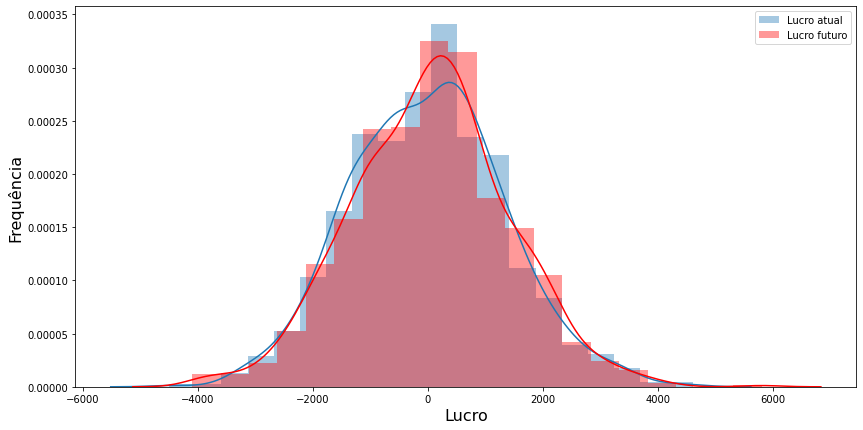

In [8]:

dias = 1000

vendas_futuras = [np.sum(np.random.binomial(n, p, size=atendentes)) for i in range(dias)]
lucro_futuro = np.array(vendas_futuras) * receita - atendentes * custo


fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(lucro_atual, bins=20, label='Lucro atual ')
ax = sns.distplot(lucro_futuro, bins=20, label='Lucro futuro', color='red')

ax.set_xlabel("Lucro",fontsize=16)
ax.set_ylabel("Frequência",fontsize=16)
plt.legend()


In [9]:
def plot_line(chamadas=50, probabilidade=0.4, custo_atendente=200):

    dias = 1000
    vendas_futuras = [np.sum(np.random.binomial(chamadas, probabilidade, size=atendentes)) for i in range(dias)]
    lucro_futuro = np.array(vendas_futuras) * receita - atendentes * custo_atendente

    fig, ax = plt.subplots(figsize=(14,7))
    ax = sns.distplot(lucro_atual, bins=20, label='Simulação - Lucro atual')
    ax = sns.distplot(lucro_futuro, bins=20, label='Simulação - Lucro futuro', color='red')

    ax.set_xlabel("Lucro",fontsize=16)
    ax.set_ylabel("Frequência",fontsize=16)
    plt.legend()

c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


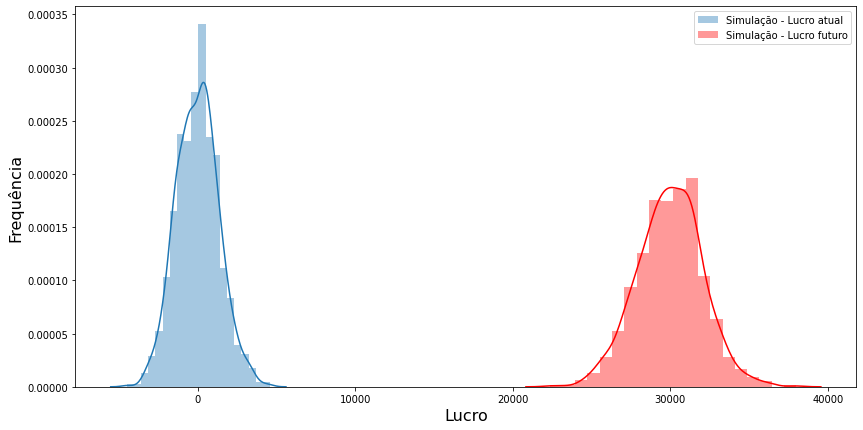

In [10]:
interactive_plot = interactive(plot_line, chamadas=(0, 100, .5), probabilidade=(0, 0.1, .02), custo_atendente=(50,200, 50))
interactive_plot

 Após uma analise podemos sugerir as seguintes ações:

  - Aumentar o número de ligações.
  - Melhorar nossa conversão de vendas.
  - Diminuir o salário dos atendentes.
  
